In [17]:
import lmfit
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat

In [18]:
def pos(x):
    for i in range(len(data[0])):
        if data[0,i]>=x:
            return i
            break

<ErrorbarContainer object of 3 artists>

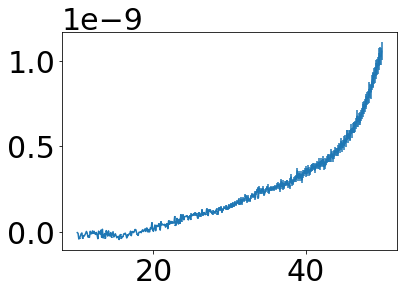

In [19]:
with open('Data/stickstoff2.csv', mode='r') as tf:
        dataex = np.genfromtxt((line.replace(',', '.') for line in tf),delimiter=";",skip_header=21).T


data = np.zeros((2,len(dataex[3])))

data[0] = dataex[3]
data[1] = dataex[4]

err = np.zeros(len(data[1]))
for i in range(len(err)):
    err[i] = (data[1,i])*0.05
data = np.vstack([data,err])

plt.errorbar(data[0],data[1],yerr=data[2])

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 200
    # variables        = 2
    chi-square         = 4079.96635
    reduced chi-square = 20.6058906
    Akaike info crit   = 607.105331
    Bayesian info crit = 613.701965
[[Variables]]
    slope:      1.5687e-11 +/- 2.7241e-13 (1.74%) (init = 1.55927e-11)
    intercept: -3.1168e-10 +/- 5.5458e-12 (1.78%) (init = -3.039974e-10)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.998


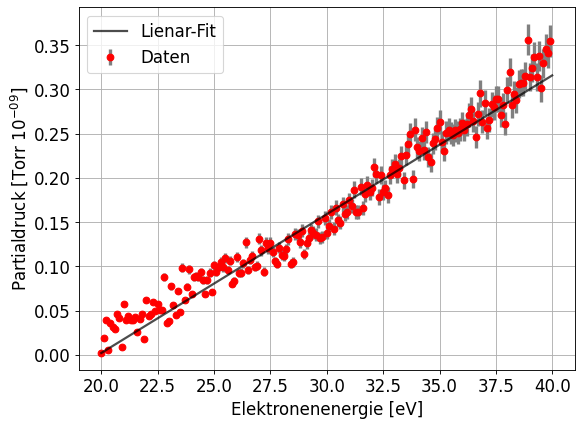

In [20]:
yscale = 1e9

plt.rc ('font', size = 15) # steuert die Standardtextgröße
plt.rc ('axes', titlesize = 15) # Schriftgröße des Titels
plt.rc ('axes', labelsize = 15) # Schriftgröße der x- und y-Beschriftungen
plt.rc ('xtick', labelsize = 15) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 15) #Schriftgröße der y-Tick-Labels
plt.rc ('legend', fontsize = 15) #Schriftgröße der Legende

v = 20
b = 40
von = pos(v)
bis = pos(b)
fig = plt.figure(figsize=(8,6),dpi=80,linewidth=50)
model_lin = lmfit.models.LinearModel()
pars_lin = model_lin.guess(data=data[1,von:bis],x=data[0,von:bis])
out_lin =  model_lin.fit(data[1,von:bis],x=data[0,von:bis],weights=1/data[2,von:bis],params=pars_lin,nan_policy='propagate')
print(out_lin.fit_report())
p1 = [np.arange(v,b,0.01),out_lin.eval(x=np.arange(v,b,0.01))]
p11= [np.arange(15,v,0.01),out_lin.eval(x=np.arange(15,v,0.01))]
p12= [np.arange(b,45,0.01),out_lin.eval(x=np.arange(b,45,0.01))]

plt.errorbar(data[0,von:bis],yscale*data[1,von:bis],yerr=yscale*data[2,von:bis],fmt='o',ecolor='gray',color='r', elinewidth=3, capsize=0,zorder=5,label="Daten",alpha=1)
plt.plot(p1[0],yscale*p1[1],zorder=10,color='k',linewidth=2,linestyle='-',alpha=0.7,label="Lienar-Fit")


plt.grid()
plt.xlabel('Elektronenenergie [eV]')
plt.ylabel('Partialdruck [Torr $10^{'+str(1/yscale).split("e")[1]+'}$]')
plt.legend()
plt.savefig('Results/lin_fit1.pdf')


In [21]:
a = ufloat(out_lin.params['slope'].value,out_lin.params['slope'].stderr)
b = ufloat(out_lin.params['intercept'].value,out_lin.params['intercept'].stderr)
print((-b/a).format(":1.5"))

19.869+/-0.494


[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 35
    # variables        = 2
    chi-square         = 8.21537695
    reduced chi-square = 0.24895082
    Akaike info crit   = -46.7269149
    Bayesian info crit = -43.6162188
[[Variables]]
    slope:      1.2191e-10 +/- 3.3570e-12 (2.75%) (init = 1.256397e-10)
    intercept: -5.0726e-09 +/- 1.6080e-10 (3.17%) (init = -5.251083e-09)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -1.000


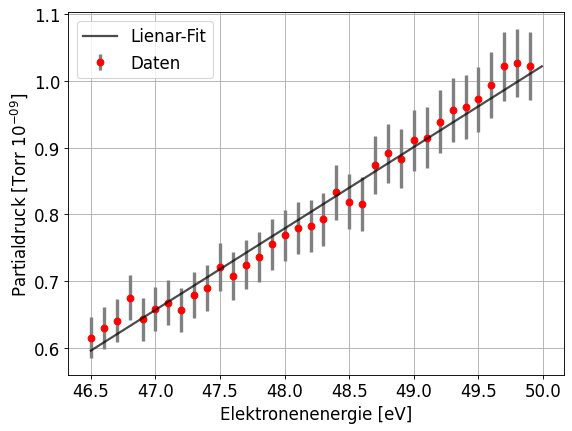

In [22]:
yscale = 1e9

plt.rc ('font', size = 15) # steuert die Standardtextgröße
plt.rc ('axes', titlesize = 15) # Schriftgröße des Titels
plt.rc ('axes', labelsize = 15) # Schriftgröße der x- und y-Beschriftungen
plt.rc ('xtick', labelsize = 15) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 15) #Schriftgröße der y-Tick-Labels
plt.rc ('legend', fontsize = 15) #Schriftgröße der Legende

v = 46.5
b = int(50)


von = pos(v)
bis = pos(50)
fig = plt.figure(figsize=(8,6),dpi=80,linewidth=50)
model_lin = lmfit.models.LinearModel()
pars_lin = model_lin.guess(data=data[1,von:bis],x=data[0,von:bis])
out_lin =  model_lin.fit(data[1,von:bis],x=data[0,von:bis],weights=1/data[2,von:bis],params=pars_lin,nan_policy='propagate')
print(out_lin.fit_report())
p2 =[np.arange(v,b,0.01),out_lin.eval(x=np.arange(v,b,0.01))]
p21= [np.arange(44.8,v,0.01),out_lin.eval(x=np.arange(44.8,v,0.01))]
p22= [np.arange(b,52,0.01),out_lin.eval(x=np.arange(b,52,0.01))]

plt.errorbar(data[0,von:bis],yscale*data[1,von:bis],yerr=yscale*data[2,von:bis],fmt='o',ecolor='gray',color='r', elinewidth=3, capsize=0,zorder=5,label="Daten",alpha=1)
plt.plot(p2[0],yscale*p2[1],zorder=10,color='k',linewidth=2,linestyle='-',alpha=0.7,label="Lienar-Fit")

plt.grid()
plt.xlabel('Elektronenenergie [eV]')
plt.ylabel('Partialdruck [Torr $10^{'+str(1/yscale).split("e")[1]+'}$]')
plt.legend()
plt.savefig('Results/lin_fit2.pdf')

In [23]:
a = ufloat(out_lin.params['slope'].value,out_lin.params['slope'].stderr)
b = ufloat(out_lin.params['intercept'].value,out_lin.params['intercept'].stderr)
print((-b/a).format(":1.5"))

41.609+/-1.747


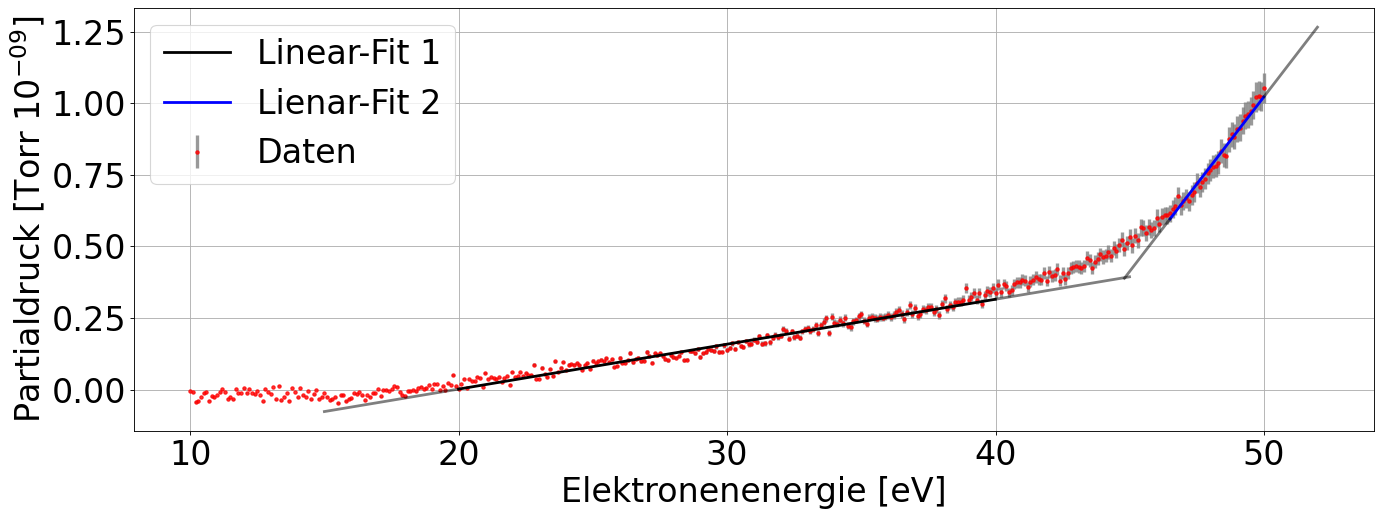

In [24]:
yscale = 1e9

plt.rc ('font', size = 30) # steuert die Standardtextgröße
plt.rc ('axes', titlesize = 30) # Schriftgröße des Titels
plt.rc ('axes', labelsize = 30) # Schriftgröße der x- und y-Beschriftungen
plt.rc ('xtick', labelsize = 30) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 30) #Schriftgröße der y-Tick-Labels
plt.rc ('legend', fontsize = 30) #Schriftgröße der Legende

fig = plt.figure(figsize=(20,7),dpi=80,linewidth=50)
plt.errorbar(data[0],yscale*data[1],yerr=yscale*data[2],fmt='.',ecolor='gray',color='r', elinewidth=3, capsize=0,zorder=5,label="Daten",alpha=0.8)
plt.plot(p1[0],yscale*p1[1],zorder=10,color='k',linewidth=2.5,linestyle='-',alpha=1,label="Linear-Fit 1")
plt.plot(p11[0],yscale*p11[1],zorder=10,color='k',linewidth=2.5,linestyle='-',alpha=0.5)
plt.plot(p12[0],yscale*p12[1],zorder=10,color='k',linewidth=2.5,linestyle='-',alpha=0.5)

plt.plot(p2[0],yscale*p2[1],zorder=10,color='b',linewidth=2.5,linestyle='-',alpha=1,label="Lienar-Fit 2")
plt.plot(p21[0],yscale*p21[1],zorder=10,color='k',linewidth=2.5,linestyle='-',alpha=0.5)
plt.plot(p22[0],yscale*p22[1],zorder=10,color='k',linewidth=2.5,linestyle='-',alpha=0.5)

plt.grid()
plt.xlabel('Elektronenenergie [eV]')
plt.ylabel('Partialdruck [Torr $10^{'+str(1/yscale).split("e")[1]+'}$]')
plt.legend()
plt.savefig('Results/lin_fit_ges.pdf')